Ensemble Techniques

1. Random Forest method

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/modified_G.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display counts before random oversampling
print("Counts before random oversampling:")
print(df['Do you currently have a mental health disorder?'].value_counts())

Counts before random oversampling:
1    2030
0    1077
Name: Do you currently have a mental health disorder?, dtype: int64


In [ ]:
# Assume the label column is named 'target'
X = df.drop('Do you currently have a mental health disorder?', axis=1)
y = df['Do you currently have a mental health disorder?']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Handle Class Imbalance (Using Random Over-sampling)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
# Display counts after random oversampling
print("\nCounts after random oversampling:")
print(pd.Series(y_train_resampled).value_counts())


Counts after random oversampling:
1    1647
0    1647
Name: Do you currently have a mental health disorder?, dtype: int64


In [ ]:
# Train Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Make Predictions
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8280
Precision: 0.8450
F1 Score: 0.8633
Cohen's Kappa: 0.6315
ROC-AUC Score: 0.8537
Confusion Matrix:
[[177  62]
 [ 45 338]]


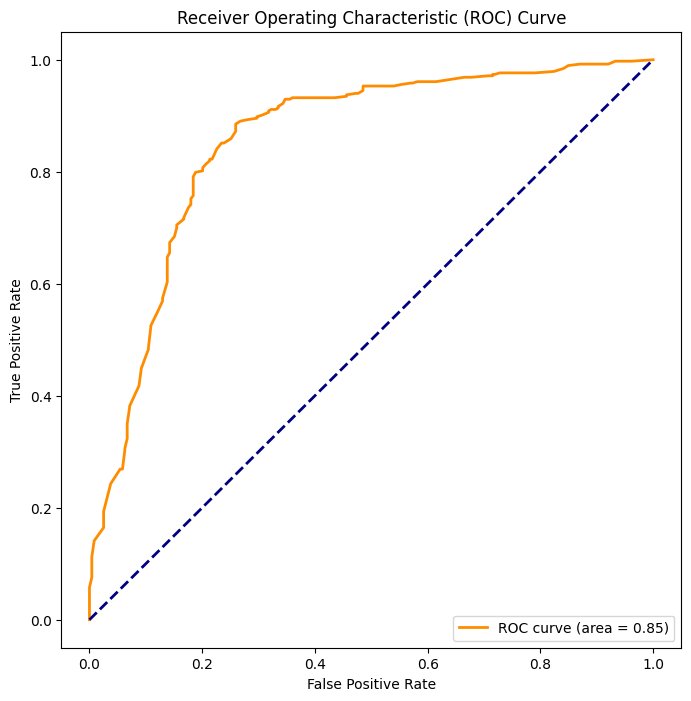

In [ ]:
# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc_curve = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_curve:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

2. Adaboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/modified_G.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display counts before random oversampling
print("Counts before random oversampling:")
print(df['Do you currently have a mental health disorder?'].value_counts())

Counts before random oversampling:
1    2030
0    1077
Name: Do you currently have a mental health disorder?, dtype: int64


In [ ]:
# Assume the label column is named 'target'
X = df.drop('Do you currently have a mental health disorder?', axis=1)
y = df['Do you currently have a mental health disorder?']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Handle Class Imbalance (Using Random Over-sampling)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


In [ ]:
# Display counts after random oversampling
print("\nCounts after random oversampling:")
print(pd.Series(y_train_resampled).value_counts())


Counts after random oversampling:
1    1647
0    1647
Name: Do you currently have a mental health disorder?, dtype: int64


In [ ]:
# Train AdaBoost Model
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(random_state=42)

In [ ]:
# Make Predictions
y_pred = adaboost_classifier.predict(X_test)

In [ ]:
# Evaluate Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, adaboost_classifier.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Performance Metrics:
Accuracy: 0.8408
Precision: 0.8622
F1 Score: 0.8723
Cohen's Kappa: 0.6612
ROC-AUC Score: 0.8758
Confusion Matrix:
[[185  54]
 [ 45 338]]


In [ ]:
# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, adaboost_classifier.predict_proba(X_test)[:, 1])
roc_auc_curve = auc(fpr, tpr)


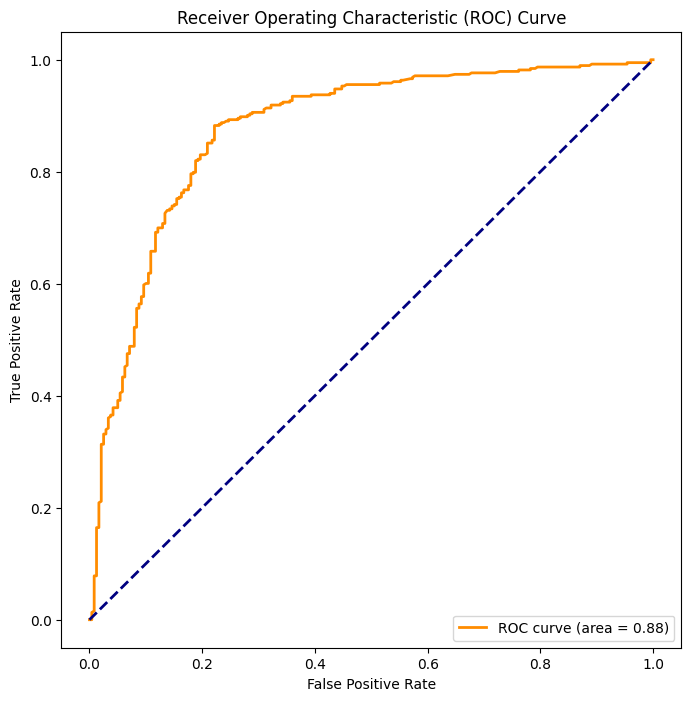

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_curve:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()